# Imports

In [1]:
import pandas as pd
from datetime import datetime
%matplotlib inline
%reload_ext watermark
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sb
from IPython.display import display
import sklearn as sk
import sklearn.neural_network as sknn


# Treating the dataset

The dates come in string so we convert them to datetime.

In [34]:
# Loading datasets

full_table = pd.read_csv('datasets/covid_19_clean_complete.csv', 
                          na_values=['NaN'],
                          parse_dates=['Date'])
# full_table = full_table.sort_values(['Date','Country/Region'],ascending=[True, False])

# Adding Active cases column
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

# filling missing values
full_table[['Province/State']] = full_table[['Province/State']].fillna('')
full_table[['Confirmed','Deaths','Recovered','Active']] = full_table[['Confirmed','Deaths','Recovered','Active']].fillna(0)

full_table.sample(6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
26365,,Iceland,64.9631,-19.020800,2020-04-30,1797,10,1670,117
7924,,Libya,26.3351,17.228331,2020-02-20,0,0,0,0
1929,Shanghai,China,31.2020,121.449100,2020-01-29,96,1,0,95
28785,,Nepal,28.1667,84.250000,2020-05-09,110,0,31,79
25250,Shanxi,China,37.5777,112.292200,2020-04-26,197,0,157,40
26124,,Maldives,3.2028,73.220700,2020-04-29,278,1,17,260


## Removing ship data

The dataset also includes data from the various ships that had COVID19 outbreaks. Since we only need the information per country we removed it from the dataset.

In [35]:


# ship rows
ship_rows = full_table['Province/State'].str.contains('Grand Princess') | full_table['Province/State'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('Diamond Princess') | full_table['Country/Region'].str.contains('MS Zaandam')

# ship
ship = full_table[ship_rows]

# dropping ship rows 
full_table = full_table[~(ship_rows)]

ship.sample(6)


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
24896,,MS Zaandam,0.0000,0.0000,2020-04-24,9,2,0,7
2473,,Diamond Princess,0.0000,0.0000,2020-01-31,0,0,0,0
21716,,MS Zaandam,0.0000,0.0000,2020-04-12,9,2,0,7
30196,,MS Zaandam,0.0000,0.0000,2020-05-14,9,2,0,7
3747,Grand Princess,Canada,37.6489,-122.6655,2020-02-05,0,0,0,0
10301,Diamond Princess,Canada,0.0000,0.0000,2020-02-29,0,0,0,0


## Grouping data

Here we are grouping data by Date and Country so we can add population and cases per million afterwards.

In [33]:
full_grouped = full_table.groupby(['Date','Country/Region'])['Confirmed','Deaths','Recovered','Active'].sum().reset_index()

full_grouped[full_grouped['Country/Region'] == 'China']

,Date,Country/Region,Confirmed,Deaths,Recovered,Active
36,2020-01-22,China,548,17,28,503
222,2020-01-23,China,643,18,30,595
408,2020-01-24,China,920,26,35,859
594,2020-01-25,China,1406,42,38,1326
780,2020-01-26,China,2075,56,48,1971
...,...,...,...,...,...,...
21612,2020-05-17,China,84054,4638,76296,3120
21798,2020-05-18,China,84063,4638,76300,3125
21984,2020-05-19,China,84063,4638,76300,3125
22170,2020-05-20,China,84063,4638,76300,3125


In [23]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31581 entries, 230 to 31800
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  31581 non-null  object        
 1   Country/Region  31581 non-null  object        
 2   Lat             31581 non-null  float64       
 3   Long            31581 non-null  float64       
 4   Date            31581 non-null  datetime64[ns]
 5   Confirmed       31581 non-null  int64         
 6   Deaths          31581 non-null  int64         
 7   Recovered       31581 non-null  int64         
 8   Active          31581 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 2.4+ MB


## Adding population

In [24]:
pop_table = pd.read_csv('datasets/population_by_country_2020.csv')

# Selecting only the Country and Population columns
pop_table = pop_table.iloc[:,:2]

# Renaming columns
pop_table.columns = ['Country/Region', 'Population']

pop_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  235 non-null    object
 1   Population      235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
# Merging the two tables
country_wise = pd.merge(country_wise, pop, on='Country/Region', how='left')

In [60]:
display(full_table.loc[ (~full_table['Province/State'].isnull())]['Country/Region'].unique())

uk_data = full_table.loc[ covid_data['Country/Region'] == 'Mainland China']

uk_data['Province/State'].unique()

uk_data.head()
# uk_data = uk_data[]

array(['United Kingdom', 'Netherlands', 'France', 'Denmark', 'China',
       'Canada', 'Australia'], dtype=object)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered


,Date,Country/Region,Province/State,C/D/R,Cases
0,2020-01-22,Spain,NaN,Confirmed,0
1,2020-01-22,Portugal,NaN,Confirmed,0
2,2020-01-23,Spain,NaN,Confirmed,0
3,2020-01-23,Portugal,NaN,Confirmed,0
4,2020-01-24,Spain,NaN,Confirmed,0
...,...,...,...,...,...
721,2020-05-19,Portugal,NaN,Recovered,6431
722,2020-05-20,Spain,NaN,Recovered,150376
723,2020-05-20,Portugal,NaN,Recovered,6452
724,2020-05-21,Spain,NaN,Recovered,150376


,count,mean,std,min,25%,50%,75%,max
Lat,242.0,39.699950,0.300672,39.3999,39.3999,39.69995,40.00,40.0
Long,242.0,-6.112250,2.116628,-8.2245,-8.2245,-6.11225,-4.00,-4.0
Confirmed,242.0,49057.822314,79008.843934,0.0000,2.0000,6399.50000,29849.00,233037.0
Deaths,242.0,4978.880165,9076.110264,0.0000,0.0000,150.00000,1672.75,27940.0
Recovered,242.0,21103.297521,42947.789842,0.0000,0.0000,68.00000,6164.25,150376.0


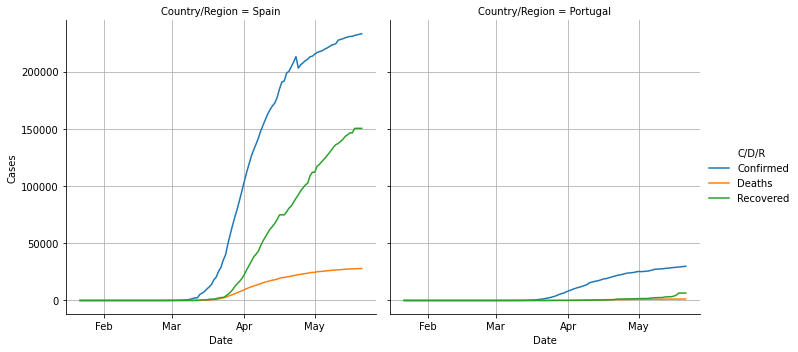

In [49]:

portugal_data = full_table.loc[(full_table['Country/Region'] == 'Portugal') | (full_table['Country/Region'] == 'Spain')]
things = ['Confirmed','Deaths','Recovered']
dd = portugal_data.melt(['Date','Country/Region','Province/State'],var_name='C/D/R', value_name='Cases',value_vars=things)


chart = sb.relplot(x='Date',y='Cases',hue='C/D/R',col='Country/Region',data=dd,kind='line')

axs = chart.axes

days = mdates.MonthLocator(interval=1)
months = mdates.MonthLocator()  # every month
days_fmt = mdates.DateFormatter('%b')

for ax in axs[0]:
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(days_fmt)
    ax.xaxis.set_minor_locator(days)

    ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
    ax.grid(True)


include = ['datetime64', 'float', 'int'] 
dd.describe(include = include).transpose()


display(dd)
portugal_data.describe().transpose()



In [26]:
def parseForNN(df):
    return df[['Lat','Long','Date']], df[['Confirmed','Deaths','Recovered']]

def daysSinceJan(d):
    return d.toordinal() - datetime(2020,1,1).toordinal()

X,Y = parseForNN(portugal_data)
X['Date'] = X['Date'].map(daysSinceJan)
X = X.values
Y = Y.values

nn = sknn.MLPRegressor(
    hidden_layer_sizes=(10,20,1000,20,10),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size='auto',
    max_iter=1000,
    verbose=True
    )

nn.fit(X,Y)



50032.11683786
Iteration 292, loss = 685654963.33712614
Iteration 293, loss = 687064220.77987039
Iteration 294, loss = 693893459.93786633
Iteration 295, loss = 693168138.44993424
Iteration 296, loss = 690795250.20149040
Iteration 297, loss = 682737044.21069729
Iteration 298, loss = 680660624.49780262
Iteration 299, loss = 679171185.57561696
Iteration 300, loss = 679593461.92837691
Iteration 301, loss = 678882460.11384165
Iteration 302, loss = 677397354.22989237
Iteration 303, loss = 676942077.98501706
Iteration 304, loss = 675278974.69949639
Iteration 305, loss = 673266269.70030701
Iteration 306, loss = 672790637.23331499
Iteration 307, loss = 674927003.62473309
Iteration 308, loss = 680050287.40247691
Iteration 309, loss = 679739753.87323236
Iteration 310, loss = 674161749.15984821
Iteration 311, loss = 672414313.47196257
Iteration 312, loss = 667504982.56960058
Iteration 313, loss = 666348903.40487838
Iteration 314, loss = 665451875.75257266
Iteration 315, loss = 664926323.86459398
I

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 20, 1000, 20, 10),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=1000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
             verbose=True, warm_start=False)

In [28]:
display(covid_data.loc[(covid_data['Country/Region'] == 'Portugal') & (covid_data['Date'] == datetime(2020,4,2))])

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
18999,NaN,Portugal,39.3999,-8.2245,2020-04-02,9034,209,68


In [29]:
nn.predict([[39.3999,-8.2245,daysSinceJan(datetime(2020,5,8)) ]])

array([[28695.74259892,   631.98191636, -2206.39038178]])